<h2>Generate description for a new photo</h2>

<p>Importing required libraries</p>

In [8]:
%matplotlib inline
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [3]:
def extract_features(filename):
    # Load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs= model.inputs, outputs = model.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size = (224,224))
    #print('the image :', image)
    # convert the image pixels to numpy array 
    image = img_to_array(image)
   # print('the numpy arrar: ', image)
    # reshape the data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get the features
    features = model.predict(image, verbose = 0)
    return features

# Map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# Generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen= max_length)
        # predict the next word
        yhat = model.predict([photo, sequence], verbose = 0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the endseq
        if word == 'endseq':
            break
      
    return in_text

In [6]:
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max seq length from training
max_length = 39
# load the model
model = load_model('model_19.h5')

startseq a dog are running through the grass endseq


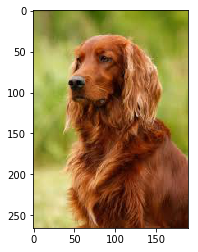

In [18]:
# load and prepare the photo
image_file = 'test18.jpg'
photo = extract_features(image_file)
img = mpimg.imread(image_file)
imgplot = plt.imshow(img)
# generate the description
description = generate_desc(model, tokenizer, photo, max_length)
print(description)